PREPARATIONS

In [1]:
#Importing the necessary libraries
import pandas as pd
from pandas import DataFrame as D
from pandas import Series as S
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import FactorAnalysis
%cd pfda

(bookmark:pfda) -> C:\Users\User\Desktop\Python for data analyses
C:\Users\User\Desktop\Python for data analyses


In [2]:
#Extracting data from excel file
data=pd.read_excel('Product_matrix.xlsx',header=0)
data.head()

,IDCustomer,Branch,Age,Gender,Last_Trans_day,Last_Trans_date_YEAR,Act_last_3_months,Online_Banking,Rocket Line Limit,Mortgage,...,Cash_desk,SWIFT,Fast_money_trans,Other_transfers,Card_withdrawal,Card_payment,QR_NFC,Comunal_payments,Idram_payments,Idram_Term_replenishment
0,Customer 1,18,71,F,-,-,+,+,-,-,...,-,-,-,-,-,-,-,-,-,-
1,Customer 2,2,61,F,05/03/2021,2021,-,+,+,-,...,+,-,-,-,-,-,-,-,-,-
2,Customer 3,17,25,M,03/02/2021,2021,-,-,-,-,...,-,-,+,+,-,-,-,-,-,-
3,Customer 4,7,44,M,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-
4,Customer 5,17,43,M,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-


In [3]:
#Dropping excess columns
data.drop(['IDCustomer','Last_Trans_day','Last_Trans_date_YEAR','Students_Loans'],axis=1,inplace=True)
data.head()

,Branch,Age,Gender,Act_last_3_months,Online_Banking,Rocket Line Limit,Mortgage,IDHome,Refinance,Gold,...,Cash_desk,SWIFT,Fast_money_trans,Other_transfers,Card_withdrawal,Card_payment,QR_NFC,Comunal_payments,Idram_payments,Idram_Term_replenishment
0,18,71,F,+,+,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-
1,2,61,F,-,+,+,-,-,-,-,...,+,-,-,-,-,-,-,-,-,-
2,17,25,M,-,-,-,-,-,-,-,...,-,-,+,+,-,-,-,-,-,-
3,7,44,M,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-
4,17,43,M,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-


In [4]:
#Handling categorical columns
data.Gender=pd.get_dummies(data.Gender)
data.head()

,Branch,Age,Gender,Act_last_3_months,Online_Banking,Rocket Line Limit,Mortgage,IDHome,Refinance,Gold,...,Cash_desk,SWIFT,Fast_money_trans,Other_transfers,Card_withdrawal,Card_payment,QR_NFC,Comunal_payments,Idram_payments,Idram_Term_replenishment
0,18,71,1,+,+,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-
1,2,61,1,-,+,+,-,-,-,-,...,+,-,-,-,-,-,-,-,-,-
2,17,25,0,-,-,-,-,-,-,-,...,-,-,+,+,-,-,-,-,-,-
3,7,44,0,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-
4,17,43,0,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-





CORRELATION MATRICES



<AxesSubplot:>

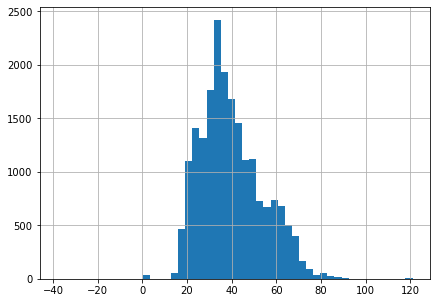

In [5]:
#Age distribution
data.Age.hist(bins=50,figsize=(7,5))

In [6]:
#Forming tables for loans and Transactions
data_loans=pd.concat([data.Age,data.replace({'+':1,'-':0}).loc[:,'Mortgage':'Other']],axis=1)
data_trans=pd.concat([data.Age,data.replace({'+':1,'-':0}).loc[:,'Curr_exch_cash':'Idram_Term_replenishment']],axis=1)
data_loans.head()

,Age,Mortgage,IDHome,Refinance,Gold,Rocket Loan,Conveyor,Credit_lines,Transfer Loans,Rocket_line,Other
0,71,0,0,0,0,0,0,0,0,0,0
1,61,0,0,0,0,0,1,1,0,0,0
2,25,0,0,0,0,0,0,0,0,0,0
3,44,0,0,0,0,0,0,0,0,0,0
4,43,0,0,0,0,0,0,0,0,0,0


In [7]:
#Cutting Age intervals
data_loans.Age=pd.cut(data_loans.Age,[0,30,60,np.inf],right=False)
data_trans.Age=pd.cut(data_trans.Age,[0,30,60,np.inf],right=False)
data_trans.head()

,Age,Curr_exch_cash,Curr_exch_non_cash,Cash_desk,SWIFT,Fast_money_trans,Other_transfers,Card_withdrawal,Card_payment,QR_NFC,Comunal_payments,Idram_payments,Idram_Term_replenishment
0,"[60.0, inf)",0,0,0,0,0,0,0,0,0,0,0,0
1,"[60.0, inf)",0,0,1,0,0,0,0,0,0,0,0,0
2,"[0.0, 30.0)",0,0,0,0,1,1,0,0,0,0,0,0
3,"[30.0, 60.0)",0,0,0,0,0,0,0,0,0,0,0,0
4,"[30.0, 60.0)",0,0,0,0,0,0,0,0,0,0,0,0


In [8]:
#Splitting tables by Age (Young,Middle-aged,Old)
y_loans=data_loans[data_loans.Age==pd.Interval(0,30,'left')].drop('Age',axis=1)
m_loans=data_loans[data_loans.Age==pd.Interval(30,60,'left')].drop('Age',axis=1)
o_loans=data_loans[data_loans.Age==pd.Interval(60,np.inf,'left')].drop('Age',axis=1)
y_trans=data_trans[data_trans.Age==pd.Interval(0,30,'left')].drop('Age',axis=1)
m_trans=data_trans[data_trans.Age==pd.Interval(30,60,'left')].drop('Age',axis=1)
o_trans=data_trans[data_trans.Age==pd.Interval(60,np.inf,'left')].drop('Age',axis=1)

In [9]:
#Plotting function
def plot_correlation_matrices(y_matrix,m_matrix,o_matrix):
    fig, axs=plt.subplots(1,3,figsize=(15,5))
    temp=y_matrix.corr().values
    np.fill_diagonal(temp,0)
    c_matrix=axs[0].matshow(temp,cmap=plt.get_cmap('jet'))
    axs[0].set_title('Young',pad=35,fontsize=15)
    fig.colorbar(c_matrix,ax=axs[0])
    
    temp=m_matrix.corr().values
    np.fill_diagonal(temp,0)
    c_matrix=axs[1].matshow(temp,cmap=plt.get_cmap('jet'))
    axs[1].set_title('Middle-aged',pad=35,fontsize=15)
    fig.colorbar(c_matrix,ax=axs[1])
    
    temp=o_matrix.corr().values
    np.fill_diagonal(temp,0)
    c_matrix=axs[2].matshow(temp,cmap=plt.get_cmap('jet'))
    axs[2].set_title('Old',pad=35,fontsize=15)
    fig.colorbar(c_matrix,ax=axs[2])

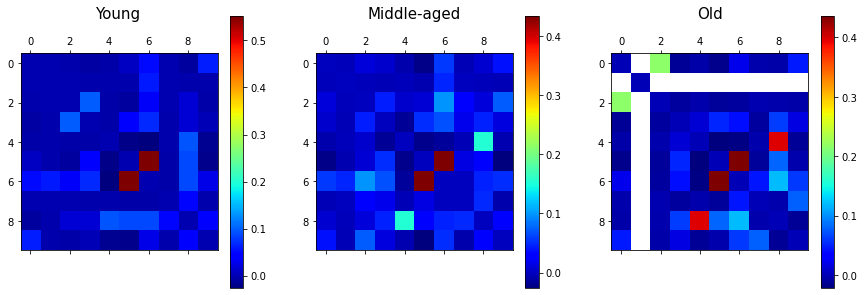

In [10]:
#Plotting Loans Correlation matrices
plot_correlation_matrices(y_loans,m_loans,o_loans)

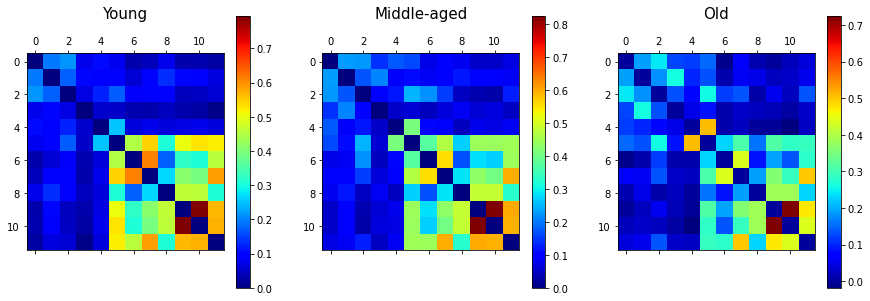

In [11]:
#Plotting Transactions Correlation matrices
plot_correlation_matrices(y_trans,m_trans,o_trans)

FACTOR ANALYSIS

In [12]:
#Factor Analysis function
def one_factor_transformer(table):
    global new_factor
    model=FactorAnalysis(n_components=1,rotation='varimax')
    model.fit(StandardScaler().fit_transform(table))
    new_factor=D(model.components_,columns=table.columns)

In [13]:
#Transactions Card Factor for Young customers
one_factor_transformer(y_trans.loc[:,['Card_withdrawal','Card_payment','Idram_Term_replenishment']])
new_factor

,Card_withdrawal,Card_payment,Idram_Term_replenishment
0,-0.692638,-0.883741,-0.665454


In [14]:
#Transactions Card Factor for Old customers
one_factor_transformer(o_trans.loc[:,['Card_withdrawal','Card_payment','Idram_Term_replenishment']])
new_factor

,Card_withdrawal,Card_payment,Idram_Term_replenishment
0,0.503125,0.868072,0.575526


In [15]:
#Transactions Idram Factor for Young customers
one_factor_transformer(y_trans.loc[:,['Comunal_payments','Idram_payments','Idram_Term_replenishment']])
new_factor

,Comunal_payments,Idram_payments,Idram_Term_replenishment
0,0.886789,0.896395,0.63911


In [16]:
#Transactions Idram Factor for Old customers
one_factor_transformer(o_trans.loc[:,['Comunal_payments','Idram_payments','Idram_Term_replenishment']])
new_factor

,Comunal_payments,Idram_payments,Idram_Term_replenishment
0,0.87883,0.824601,0.536594


LOANS AND DEPOSITS CROSS RESEARCH

In [17]:
#Preparing data
loans=data.loc[:,'Mortgage':'Other']
deposits=data.loc[:,'Deposit':'Deposit_box']

In [18]:
#Cross_sale function
def cross_sale(one,two):
    one=D(pd.concat([one,S(np.arange(len(one.index)))],axis=1))
    global cross_sales
    entire_table=[]
    for i in one.columns[:-1]:
        carcass=D(D(pd.concat([one[i],two.iloc[:,0]],axis=1).value_counts())).fillna(0)
        for j in two.columns[1:]:
            carcass=D(pd.concat([carcass,pd.concat([one[i],two[j]],axis=1).value_counts()],axis=1)).fillna(0)
        carcass.index.name=i
        carcass.columns=two.columns
        entire_table+=[carcass]
    if len(entire_table)>1:
        cross_sales=pd.concat([entire_table[0],entire_table[1]],axis=0,keys=['Deposit','Deposit_box'])
    else:
        cross_sales=entire_table[0].T.iloc[:,[0,2]]
        cross_sales.columns=['Online','Offline']

In [19]:
#Cross_sales table
cross_sale(deposits,loans)
cross_sales

Mortgage   IDHome  Refinance     Gold  Rocket Loan  Conveyor  \
Deposit     + +       3.0      0.0        0.0      3.0          1.0       9.0   
              -     391.0    394.0      394.0    391.0        393.0     385.0   
            - +      83.0      4.0       69.0    719.0        186.0    1500.0   
              -   19523.0  19602.0    19537.0  18887.0      19420.0   18106.0   
Deposit_box + +       0.0      0.0        0.0      0.0          0.0       0.0   
              -      15.0     15.0       15.0     15.0         15.0      15.0   
            - +      86.0      4.0       69.0    722.0        187.0    1509.0   
              -   19899.0  19981.0    19916.0  19263.0      19798.0   18476.0   

                 Credit_lines  Transfer Loans  Rocket_line    Other  
Deposit     + +            41             0.0          2.0     23.0  
              -           353           394.0        392.0    371.0  
            - +          1503            28.0        525.0    469.0  
              -         18103         19578.0      19081.0  19137.0  
Deposit_box + +             1             0.0          0.0      0.0  
              -            14            15.0         15.0     15.0  
            - +          1543            28.0        527.0    492.0  
              -         18442         19957.0      19458.0  19493.0

ONLINE/OFFLINE BANKING

In [20]:
#Preparing data
online_banking=data.loc[:,'Online_Banking']
products=data.loc[:,'Mortgage':'Other']

In [21]:
#Cross_sales table
cross_sale(online_banking,products)
cross_sales

,Online,Offline
Mortgage,63.0,23.0
IDHome,3.0,1.0
Refinance,40.0,29.0
Gold,421.0,301.0
Rocket Loan,187.0,0.0
Conveyor,892.0,617.0
Credit_lines,1049.0,495.0
Transfer Loans,16.0,12.0
Rocket_line,527.0,0.0
Other,214.0,278.0


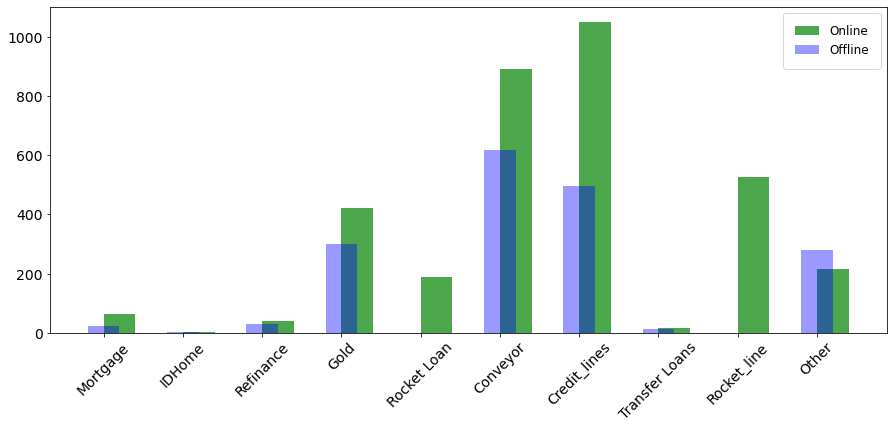

In [22]:
#Plotting table
plt.figure(figsize=(15,6))
plt.bar(cross_sales.index,cross_sales.iloc[:,0],width=0.4,align='edge',color='g',alpha=0.7)
plt.bar(cross_sales.index,cross_sales.iloc[:,1],width=0.4,align='center',color='b',alpha=0.4)
plt.xticks(rotation=45,fontsize=14)
plt.yticks(fontsize=14)
plt.legend(['Online','Offline'],handlelength=2,borderpad=1,fontsize=12)

In [23]:
#Online Banking - Activity
D(data.loc[:,['Online_Banking','Act_last_3_months']].value_counts())

,,0
Online_Banking,Act_last_3_months,
-,-,7494
+,+,5601
-,+,3521
+,-,3384


CLUSTERIZATION

In [24]:
#Preparing data
c_loans=data.loc[:,'Age':'Other'].replace({'+':1,'-':0})
c_trans=pd.concat([data.loc[:,'Age':'Online_Banking'],data.loc[:,'Curr_exch_cash':'Idram_Term_replenishment']],axis=1).replace({'+':1,'-':0})
c_loans_std=StandardScaler().fit_transform(c_loans)
c_trans_std=StandardScaler().fit_transform(c_trans)

In [25]:
#KMeans plot
def kmeans_plot(data):
    K=range(1,20)
    models=[KMeans(n_clusters=k,random_state=42).fit(data) for k in K]
    dist=[model.inertia_ for model in models]
    plt.figure(figsize=(15,6))
    plt.plot(K,dist,'g-',marker='o',markersize=5,markeredgecolor='r')
    plt.xlabel('Number of clusters',fontsize=15)
    plt.ylabel('Distances',fontsize=15)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)

Text(10, 200000, 'There is no good clusterization variant here')

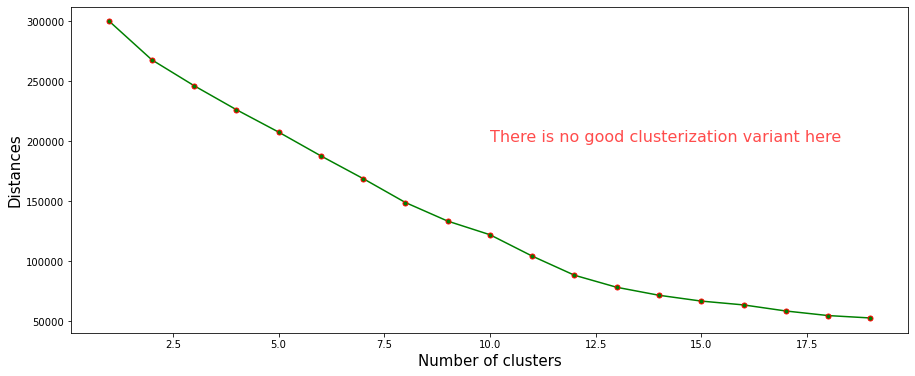

In [26]:
#Scree plot for Loans
kmeans_plot(c_loans_std) 
plt.text(10,200000,'There is no good clusterization variant here',color='r',alpha=0.7,fontsize=16)

Text(9, 250000, 'The only sensible option is the variant of 2 clusters')

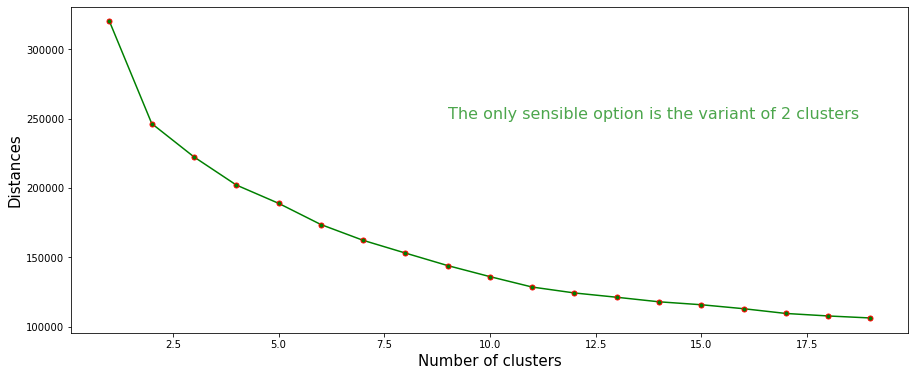

In [27]:
#Scree plot for Transactions
kmeans_plot(c_trans_std)
plt.text(9,250000,'The only sensible option is the variant of 2 clusters',color='g',alpha=0.7,fontsize=16)

In [28]:
#Cluster Analysis for Transactions
model=KMeans(n_clusters=2,random_state=42).fit(c_trans_std)
c_trans['cluster']=model.labels_
clusters=c_trans[c_trans.loc[:,'Curr_exch_cash':'Idram_Term_replenishment'].sum(axis=1)>=1].groupby('cluster').mean().T.applymap(lambda x:'%0.0f'%round(x,0)).add_prefix('Cluster_')
clusters

cluster,Cluster_0,Cluster_1
Age,43,35
Gender,1,0
Act_last_3_months,0,1
Online_Banking,0,1
Curr_exch_cash,0,0
Curr_exch_non_cash,0,0
Cash_desk,1,0
SWIFT,0,0
Fast_money_trans,0,0
Other_transfers,0,1


In [29]:
#Only different Transactions
clusters[(clusters.sum(axis=1)!=0)&(clusters.sum(axis=1)!=0)]

cluster,Cluster_0,Cluster_1
Age,43,35
Gender,1,0
Act_last_3_months,0,1
Online_Banking,0,1
Cash_desk,1,0
Other_transfers,0,1
Card_withdrawal,0,1
Card_payment,0,1
Comunal_payments,0,1
Idram_payments,0,1
